In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import seaborn as sns

/dsw/snapshots/snapshot_dsw_default_jupyter/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
# Label: The hourly average gb per plan per scan at city-level
# Feature Set:
#     avg(plans.driver_cancel_prob) as market_driver_cancel_prob,
#     avg(plans.rider_cancel_prob) as market_rider_cancel_prob,
#     avg(plans.spinner_cancel_prob) as market_spinner_cancel_prob,
#     avg(plans.eta) as market_eta,
#     avg(plans.surge_mul) as market_surge_mul,
#     avg(plans.eventual_comp_prob) as market_eventual_comp_prob,
#     avg(completed.client_upfront_fare_usd) as market_gb,

#     avg(plans.eta_one) as market_eta_one,  -- (1 - eta/1500)
#     avg(plans.eta_one_quarter) as market_eta_one_quarter, -- (1 - eta/1500)^1.25
#     avg(plans.eta_square) as market_eta_square,  -- (1 - eta/1500)**2
#     avg(plans.eta_cube) as market_eta_cube,  -- (1 - eta/1500)**3
#     avg(plans.network_contention_2) as market_network_contention_2,  -- 1 / (1 + surge_mul**2)
#     avg(plans.network_contention_3) as market_network_contention_3,  -- 1 / (1 + surge_mul**3)
#     avg(plans.network_contention_5) as market_network_contention_5,  -- 1 / (1 + surge_mul**5)

#     avg(plans.cr_ratio) as market_cr_ratio,  -- (1.0 - mgv.driver_cancel_prob) * (1.0 - mgv.rider_cancel_prob) * (1.0 - mgv.spinner_cancel_prob) + mgv.eventual_comp_prob * mgv.driver_cancel_prob

#     avg(plans.eta_one * plans.cr_ratio) as market_eta_one_cr_ratio,
#     avg(plans.eta_one_quarter * plans.cr_ratio) as market_eta_one_quarter_cr_ratio,
#     avg(plans.eta_square * plans.cr_ratio) as market_eta_square_cr_ratio,
#     avg(plans.eta_cube * plans.cr_ratio) as market_eta_cube_cr_ratio,
#     avg(plans.network_contention_2 * plans.eta_one) as market_network_2_eta_1,
#     avg(plans.network_contention_3 * plans.eta_one) as market_network_3_eta_1,
#     avg(plans.network_contention_5 * plans.eta_one) as market_network_5_eta_1,
#     avg(plans.network_contention_2 * plans.eta_one_quarter) as market_network_2_eta_1_25,
#     avg(plans.network_contention_3 * plans.eta_one_quarter) as market_network_3_eta_1_25,
#     avg(plans.network_contention_5 * plans.eta_one_quarter) as market_network_5_eta_1_25,
#     avg(plans.network_contention_2 * plans.eta_square) as market_network_2_eta_2,
#     avg(plans.network_contention_3 * plans.eta_square) as market_network_3_eta_2,
#     avg(plans.network_contention_5 * plans.eta_square) as market_network_5_eta_2,
#     avg(plans.network_contention_2 * plans.eta_cube) as market_network_2_eta_3,
#     avg(plans.network_contention_3 * plans.eta_cube) as market_network_3_eta_3,
#     avg(plans.network_contention_5 * plans.eta_cube) as market_network_5_eta_3,
#     avg((1 - plans.network_contention_2) * plans.cr_ratio) as market_network_2_cr_ratio,
#     avg((1 - plans.network_contention_3) * plans.cr_ratio) as market_network_3_cr_ratio,
#     avg((1 - plans.network_contention_5) * plans.cr_ratio) as market_network_5_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_25_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_2_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_3_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_1_gb_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_1_gb_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_1_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_2_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_2_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_2_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_3_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_3_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_3_gb_cr_ratio


In [3]:
# Read in data: features & labels
df_features_dict = {}
df_labels_dict = {}

num_feature_files = 13
num_label_files = 13

for i in range(1, num_feature_files):
    df_features_dict[i] = pd.read_csv(f'latam_hourly_features_{i}.csv')

for i in range(1, num_label_files):
    df_labels_dict[i] = pd.read_csv(f'latam_hourly_labels_{i}.csv')

In [4]:
df_features_frames = [df_features_dict[1], df_features_dict[2], df_features_dict[3],
                      df_features_dict[4], df_features_dict[5], df_features_dict[6],
                      df_features_dict[7], df_features_dict[8], df_features_dict[9],
                      df_features_dict[10], df_features_dict[11], df_features_dict[12]
                     ]

df_labels_frames = [df_labels_dict[1], df_labels_dict[2], df_labels_dict[3],
                    df_labels_dict[4], df_labels_dict[5], df_labels_dict[6],
                    df_labels_dict[7], df_labels_dict[8], df_labels_dict[9],
                    df_labels_dict[10], df_labels_dict[11], df_labels_dict[12]
                   ]

df_features = pd.concat(df_features_frames, ignore_index=True)
df_labels = pd.concat(df_labels_frames, ignore_index=True)

df_features.drop('num_plans', axis=1, inplace=True)
df_labels.drop('num_plans', axis=1, inplace=True)

df = pd.merge(df_features, df_labels,
              how='left',
              left_on=['datestr', 'city_id', 'hour_of_day'],
              right_on=['datestr', 'city_id', 'hour_of_day']
             )

In [5]:
y_100 = df['hour_gb_gamma_100']
y_99 = df['hour_gb_gamma_99']
y_95 = df['hour_gb_gamma_95']
y_90 = df['hour_gb_gamma_90']

X = df.loc[:, ['market_driver_cancel_prob',
                'market_rider_cancel_prob',
                'market_spinner_cancel_prob',
                'market_surge_mul',
                'market_eventual_comp_prob',
                'market_eta_one',
                'market_eta_one_quarter',
                'market_eta_square',
                'market_eta_cube',
                'market_network_contention_2',
                'market_network_contention_3',
                'market_network_contention_5',
                'market_cr_ratio',
                'market_eta_one_cr_ratio',
                'market_eta_square_cr_ratio',
                'market_eta_cube_cr_ratio',
                'market_network_2_eta_1',
                'market_network_3_eta_1',
                'market_network_5_eta_1',
                'market_network_2_eta_1_25',
                'market_network_3_eta_1_25',
                'market_network_5_eta_1_25',
                'market_network_2_eta_2',
                'market_network_3_eta_2',
                'market_network_5_eta_2',
                'market_network_2_eta_3',
                'market_network_3_eta_3',
                'market_network_5_eta_3',
                'market_network_2_cr_ratio',
                'market_network_3_cr_ratio',
                'market_network_5_cr_ratio',
                'market_network_2_eta_1_cr_ratio',
                'market_network_3_eta_1_cr_ratio',
                'market_network_5_eta_1_cr_ratio',
                'market_network_2_eta_1_25_cr_ratio',
                'market_network_3_eta_1_25_cr_ratio',
                'market_network_5_eta_1_25_cr_ratio',
                'market_network_2_eta_2_cr_ratio',
                'market_network_3_eta_2_cr_ratio',
                'market_network_5_eta_2_cr_ratio',
                'market_network_2_eta_3_cr_ratio',
                'market_network_3_eta_3_cr_ratio',
                'market_network_5_eta_3_cr_ratio',
                'market_network_2_eta_1_gb_cr_ratio',
                'market_network_3_eta_1_gb_cr_ratio',
                'market_network_5_eta_1_gb_cr_ratio',
                'market_network_2_eta_1_25_gb_cr_ratio',
                'market_network_3_eta_1_25_gb_cr_ratio',
                'market_network_5_eta_1_25_gb_cr_ratio',
                'market_network_2_eta_2_gb_cr_ratio',
                'market_network_3_eta_2_gb_cr_ratio',
                'market_network_5_eta_2_gb_cr_ratio',
                'market_network_2_eta_3_gb_cr_ratio',
                'market_network_3_eta_3_gb_cr_ratio',
                'market_network_5_eta_3_gb_cr_ratio'
              ]
          ]

In [6]:
df[['hour_gb_gamma_100',
    'hour_gb_gamma_99',
    'hour_gb_gamma_95',
    'hour_gb_gamma_90']
  ].describe()

,hour_gb_gamma_100,hour_gb_gamma_99,hour_gb_gamma_95,hour_gb_gamma_90
count,5749.000000,5749.000000,5749.000000,5749.000000
mean,3.920714,2.961910,1.252620,0.657305
std,1.128755,0.850152,0.372537,0.208164
min,2.399916,1.803721,0.621573,0.246398
25%,3.096629,2.344741,0.984857,0.510191
50%,3.517865,2.656570,1.135344,0.597947
75%,4.500569,3.398367,1.441053,0.767071
max,11.058756,8.316370,3.688448,2.095657


In [7]:
y = y_90
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [8]:
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=9)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=9,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
lasso.intercept_

0.7408204001068599

In [10]:
lasso.coef_

array([ 0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.16502126, -0.70017968, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.37392881,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
pd.Series(lasso.coef_, index = X_train.columns )

market_driver_cancel_prob                0.000000
market_rider_cancel_prob                 0.000000
market_spinner_cancel_prob              -0.000000
market_surge_mul                        -0.000000
market_eventual_comp_prob               -0.000000
market_eta_one                          -0.000000
market_eta_one_quarter                  -0.000000
market_eta_square                       -0.000000
market_eta_cube                         -0.000000
market_network_contention_2              0.000000
market_network_contention_3              0.000000
market_network_contention_5              0.000000
market_cr_ratio                         -0.165021
market_eta_one_cr_ratio                 -0.700180
market_eta_square_cr_ratio              -0.000000
market_eta_cube_cr_ratio                -0.000000
market_network_2_eta_1                  -0.000000
market_network_3_eta_1                  -0.000000
market_network_5_eta_1                  -0.000000
market_network_2_eta_1_25               -0.000000


In [12]:
y = y_90
X = df.loc[:, ['market_cr_ratio',
               'market_eta_one_cr_ratio',
               'market_network_2_eta_1_gb_cr_ratio'
              ]
          ]

In [13]:
# Add intercept to X
X['intercept'] = [1 for _ in range(len(X.index))]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [15]:
# Model Training
model = sm.OLS(y_train, X_train)

In [16]:
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:       hour_gb_gamma_90   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3121.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:43:49   Log-Likelihood:                 3235.5
No. Observations:                4599   AIC:                            -6463.
Df Residuals:                    4595   BIC:                            -6437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
mark

In [17]:
# Train RMSE
y_train_pred = trained_model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
train_rmse

0.11973760748754134

In [18]:
# Test RMSE
y_test_pred = trained_model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
test_rmse

0.13032470239985736

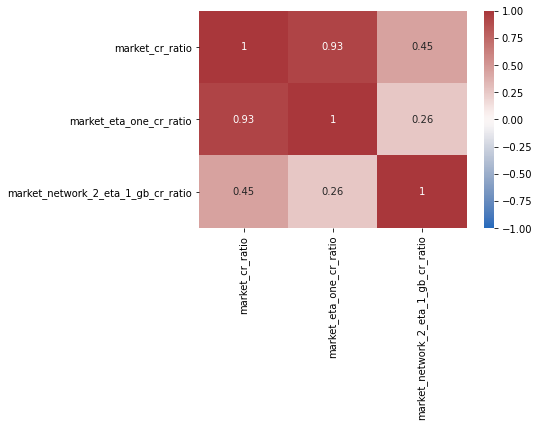

In [19]:
# Visualizing a Pandas Correlation Matrix
corr_matrix = X.loc[:, X.columns != 'intercept'].corr().round(2)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()